## 1. TSP problem

## 3.Vehicle Routing problem

In [0]:
!pip install ortools

     |████████████████████████████████| 27.7MB 110kB/s 


In [0]:
"""Vehicles Routing Problem (VRP)."""

from __future__ import print_function
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
import matplotlib.pyplot as plt


In [0]:
def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = [
        [
            0, 548, 776, 696, 582, 274, 502, 194, 308, 194, 536, 502, 388, 354,
            468, 776, 662
        ],
        [
            548, 0, 684, 308, 194, 502, 730, 354, 696, 742, 1084, 594, 480, 674,
            1016, 868, 1210
        ],
        [
            776, 684, 0, 992, 878, 502, 274, 810, 468, 742, 400, 1278, 1164,
            1130, 788, 1552, 754
        ],
        [
            696, 308, 992, 0, 114, 650, 878, 502, 844, 890, 1232, 514, 628, 822,
            1164, 560, 1358
        ],
        [
            582, 194, 878, 114, 0, 536, 764, 388, 730, 776, 1118, 400, 514, 708,
            1050, 674, 1244
        ],
        [
            274, 502, 502, 650, 536, 0, 228, 308, 194, 240, 582, 776, 662, 628,
            514, 1050, 708
        ],
        [
            502, 730, 274, 878, 764, 228, 0, 536, 194, 468, 354, 1004, 890, 856,
            514, 1278, 480
        ],
        [
            194, 354, 810, 502, 388, 308, 536, 0, 342, 388, 730, 468, 354, 320,
            662, 742, 856
        ],
        [
            308, 696, 468, 844, 730, 194, 194, 342, 0, 274, 388, 810, 696, 662,
            320, 1084, 514
        ],
        [
            194, 742, 742, 890, 776, 240, 468, 388, 274, 0, 342, 536, 422, 388,
            274, 810, 468
        ],
        [
            536, 1084, 400, 1232, 1118, 582, 354, 730, 388, 342, 0, 878, 764,
            730, 388, 1152, 354
        ],
        [
            502, 594, 1278, 514, 400, 776, 1004, 468, 810, 536, 878, 0, 114,
            308, 650, 274, 844
        ],
        [
            388, 480, 1164, 628, 514, 662, 890, 354, 696, 422, 764, 114, 0, 194,
            536, 388, 730
        ],
        [
            354, 674, 1130, 822, 708, 628, 856, 320, 662, 388, 730, 308, 194, 0,
            342, 422, 536
        ],
        [
            468, 1016, 788, 1164, 1050, 514, 514, 662, 320, 274, 388, 650, 536,
            342, 0, 764, 194
        ],
        [
            776, 868, 1552, 560, 674, 1050, 1278, 742, 1084, 810, 1152, 274,
            388, 422, 764, 0, 798
        ],
        [
            662, 1210, 754, 1358, 1244, 708, 480, 856, 514, 468, 354, 844, 730,
            536, 194, 798, 0
        ],
    ]
    data['num_vehicles'] = 9
    #data['depot'] = 0
    data['demands'] = [0, 1, 1, 2, 4, 2, 5 , 8, 8, 1, 2, 1, 2, 4, 4, 8, 0]

    data['vehicle_capacities'] = [14, 12, 16, 12, 15, 20,12,14,20]
    data['min_capacity'] = [int(0.85*data['vehicle_capacities'][i]) for i in range(data['num_vehicles'])]
    data['starts'] = [0]*data['num_vehicles']
    data['ends'] = [16]*data['num_vehicles']
    return data

data = create_data_model()
print("nodes",len(data['distance_matrix']))
print("demands: must be equal to nodes",len(data['demands']))
data['vehicle_capacities']

print(data['min_capacity'])
print(data['starts'])
print(data['ends'])
if len(data['vehicle_capacities']) == data['num_vehicles']:
    print("bus np. == length of bus capacitites", data['num_vehicles'])

nodes 17
demands: must be equal to nodes 17
[11, 10, 13, 10, 12, 17, 10, 11, 17]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[16, 16, 16, 16, 16, 16, 16, 16, 16]
bus np. == length of bus capacitites 9


In [0]:
import numpy as np
np.sum(data['demands'])

53

In [0]:

def print_solution(data, manager, routing, assignment):
    """Prints assignment on console."""
    print("objective cost: ", assignment.ObjectiveValue())
    print()
    plot_values = []
    
    total_distance = 0
    total_load = 0
    
    for vehicle_id in range(data['num_vehicles']):
        each_vehicle = []
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {0} with minimum capacity {1}:\n'.format(vehicle_id,data['min_capacity'][vehicle_id])
        route_distance = 0
        route_load = 0
        
        while not routing.IsEnd(index):
            node_index = manager.IndexToNode(index)
            each_vehicle.append(node_index)
            route_load += data['demands'][node_index]
            plan_output += ' {0} (Load({1})) -> '.format(node_index, route_load)
            previous_index = index
            index = assignment.Value(routing.NextVar(index))
            
            route_distance += routing.GetArcCostForVehicle(previous_index, index, vehicle_id)
            
        plan_output += ' {0} Load({1})\n'.format(manager.IndexToNode(index),route_load)
        
        plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        
        plan_output += 'Load of the route: {}\n'.format(route_load)
    
        if route_load != 0 and route_distance != 0:
            each_vehicle.append(manager.IndexToNode(index))
            print(plan_output)
            print('\n'+"*"*30)
        
        total_distance += route_distance
        total_load += route_load
        plot_values.append(each_vehicle)
        
        
    print('Total distance of all routes: {}m'.format(total_distance))
    print('Total load of all routes: {}'.format(total_load))
    return plot_values
    
            
        

## cost functions

 - SetAmortizedCostFactorsOfAllVehicles
     - v: INDICATOR(v used in the model) * [linear_cost_factor_of_vehicle_[v] - quadratic_cost_factor_of_vehicle_[v]*(square of length of route v)]
     
 - global_span_cost = coefficient * (Max(dimension_end_value) - Min(dimension start value))  

In [0]:
def main():
    
    data = create_data_model()

    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),data['num_vehicles'], data['starts'], data['ends'])

    routing = pywrapcp.RoutingModel(manager)

    routing.SetAmortizedCostFactorsOfAllVehicles(linear_cost_factor= 10*6, quadratic_cost_factor=1)
    
    
    ###################### Dimension 1: Distance           #####################################
    
    def distance_callback(from_index, to_index):
        
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)
    
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)
    
    dimension_name = 'Distance'
    routing.AddDimension(transit_callback_index,0, 3000, True, dimension_name)
    distance_dimension = routing.GetDimensionOrDie(dimension_name)
    distance_dimension.SetGlobalSpanCostCoefficient(7)
    
    
    ####################          Dimension 2: Capacity          ####################################
    capacity_dim = 'capacity'
    def demand_callback(from_index):
        from_node = manager.IndexToNode(from_index)
        return data['demands'][from_node]

    demand_callback_index = routing.RegisterUnaryTransitCallback(demand_callback)
    
    routing.AddDimensionWithVehicleCapacity(demand_callback_index,0, data['vehicle_capacities'], True,capacity_dim)
    
             #######     min capactity
    capacity_dimension = routing.GetDimensionOrDie(capacity_dim)
    minimum_allowed_capacity = data['min_capacity']
    for vehicle in range(data['num_vehicles']):
        capacity_dimension.CumulVar(routing.End(vehicle)).RemoveInterval(1, minimum_allowed_capacity[vehicle])
    
    #########################################################################################################
    
    #for vehicle in range(data['num_vehicles']):
     #   routing.ConsiderEmptyRouteCostsForVehicle(True,vehicle)
    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (routing_enums_pb2.FirstSolutionStrategy.LOCAL_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)
    #print(solution)
    # Print solution on console.
    if solution:
        plot_values = print_solution(data, manager, routing, solution)
    print(plot_values)
    return plot_values, routing, search_parameters


plot_values, routing, search_parameters = main()

objective cost:  21697

Route for vehicle 0 with minimum capacity 11:
 0 (Load(0)) ->  5 (Load(2)) ->  9 (Load(3)) ->  12 (Load(5)) ->  11 (Load(6)) ->  15 (Load(14)) ->  16 Load(14)
Distance of the route: 2122m
Load of the route: 14


******************************
Route for vehicle 5 with minimum capacity 17:
 0 (Load(0)) ->  8 (Load(8)) ->  6 (Load(13)) ->  2 (Load(14)) ->  10 (Load(16)) ->  14 (Load(20)) ->  16 Load(20)
Distance of the route: 1758m
Load of the route: 20


******************************
Route for vehicle 8 with minimum capacity 17:
 0 (Load(0)) ->  1 (Load(1)) ->  3 (Load(3)) ->  4 (Load(7)) ->  7 (Load(15)) ->  13 (Load(19)) ->  16 Load(19)
Distance of the route: 2214m
Load of the route: 19


******************************
Total distance of all routes: 6094m
Total load of all routes: 53
[[0, 5, 9, 12, 11, 15, 16], [0], [0], [0], [0], [0, 8, 6, 2, 10, 14, 16], [0], [0], [0, 1, 3, 4, 7, 13, 16]]


[0, 0, 5, 9, 12, 11, 15, 16, 16]
[0, 0, 8, 6, 2, 10, 14, 16, 16]
[0, 0, 1, 3, 4, 7, 13, 16, 16]


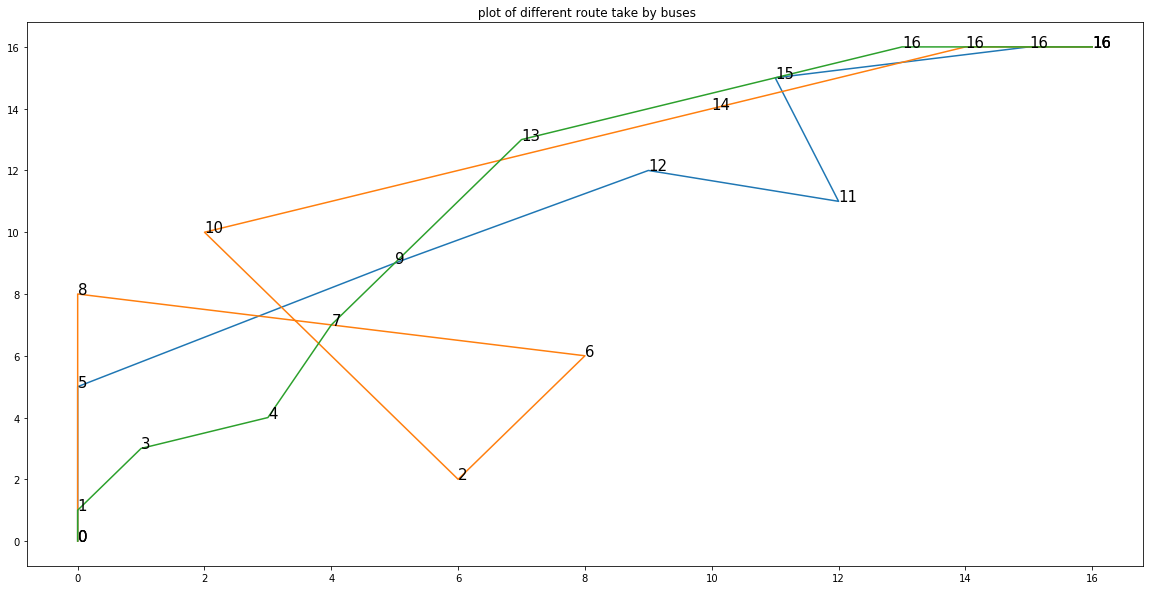

In [0]:
import time
def plot(plot_values):
    plt.figure(figsize= [20,10])
    plt.title(" plot of different route take by buses")
    nodes = len(plot_values)
    
    
    for i in range(nodes):
        if len(plot_values[i]) != 1:
            bus_i_route = plot_values[i].copy()
            
            start = bus_i_route[0]
            end = bus_i_route[-1]
             
            bus_i_route.insert(0,start) #pad with first word before
            bus_i_route.insert(-1,end)     #pad with end point after
            print(bus_i_route)
            plt.plot(bus_i_route[:-1],bus_i_route[1:])
            for a,b in zip(bus_i_route[:-1], bus_i_route[1:]): 
                plt.text(a, b, str(b), fontsize=15)
    plt.show()

plot(plot_values)